<h1> Netflix Case Study: Text Analysis

<h2> Zaimportuj Pakiety

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from scipy.stats import pearsonr
import statistics
import numpy as np

<h2> Zaczytaj Dane

In [2]:
users_reviews_df = pd.read_excel(r"/Users/kasiabonter/Desktop/Netflix Datasets/Netflix_Users_Reviews_processed.xlsx")
critics_reviews_df = pd.read_excel(r"/Users/kasiabonter/Desktop/Netflix Datasets/Netflix_Critics_Reviews_processed.xlsx")
shows_links_df = pd.read_excel(r"/Users/kasiabonter/Desktop/Netflix Datasets/Netflix_TV_Shows_Links_processed.xlsx")

<h2> Przygotowanie danych

In [4]:
def data_preparation(dataframe):
    dataframe = dataframe.loc[:, ['title', 'review']]
    dataframe['review'] = dataframe['review'].str.lower()
    return dataframe

critics_reviews_df = data_preparation(critics_reviews_df)
users_reviews_df = data_preparation(users_reviews_df)

In [5]:
critics_reviews_df.head(2)

,title,review
0,Avatar: The Last Airbender,a stalwart example of allegory's power to info...
1,Avatar: The Last Airbender,"great characters, detailed fantasy worldbuildi..."


In [6]:
users_reviews_df.head(2)

,title,review
0,Avatar: The Last Airbender,"this is a show for children, yet it is far mor..."
1,Avatar: The Last Airbender,this is overall a pretty amazing show. i did f...


<h2> Analiza sentymentu

In [7]:
def get_sentiment(texts):
    analysis = TextBlob(texts)
    return analysis.sentiment.polarity

users_reviews_df['sentiment'] = users_reviews_df['review'].apply(get_sentiment)
critics_reviews_df['sentiment'] = critics_reviews_df['review'].apply(get_sentiment)

In [8]:
users_reviews_df.head(2)

,title,review,sentiment
0,Avatar: The Last Airbender,"this is a show for children, yet it is far mor...",0.195238
1,Avatar: The Last Airbender,this is overall a pretty amazing show. i did f...,0.283333


In [9]:
critics_reviews_df.head(2)

,title,review,sentiment
0,Avatar: The Last Airbender,a stalwart example of allegory's power to info...,-0.500000
1,Avatar: The Last Airbender,"great characters, detailed fantasy worldbuildi...",0.173333


In [10]:
def sentiment_statistics(dataframe):
    count_of_records = len(dataframe['title'])
    count_of_productions = len(set(dataframe['title']))
    sentiment_median = statistics.median(dataframe['sentiment'])
    sentiment_max = max(dataframe['sentiment'])
    sentiment_min = dataframe['sentiment'].min()
    sentiment_quantiles = np.quantile(dataframe['sentiment'], [0,0.25,0.5,0.75,1])
    print('Records Count: ', count_of_records, 'Content Count:', count_of_productions, 'Sentiment Median:', sentiment_median, 'Sentiment Max:', sentiment_max, 'Sentiment Min:', sentiment_min, 'Quantiles: ', sentiment_quantiles)

sentiment_statistics(users_reviews_df)
sentiment_statistics(critics_reviews_df)

Records Count:  21225 Content Count: 92 Sentiment Median: 0.2108771929824562 Sentiment Max: 1.0 Sentiment Min: -1.0 Quantiles:  [-1.          0.          0.21087719  0.425       1.        ]
Records Count:  3138 Content Count: 89 Sentiment Median: 0.16 Sentiment Max: 1.0 Sentiment Min: -1.0 Quantiles:  [-1.          0.          0.16        0.31111111  1.        ]


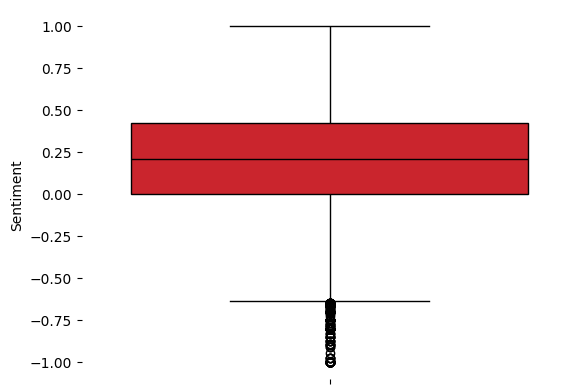

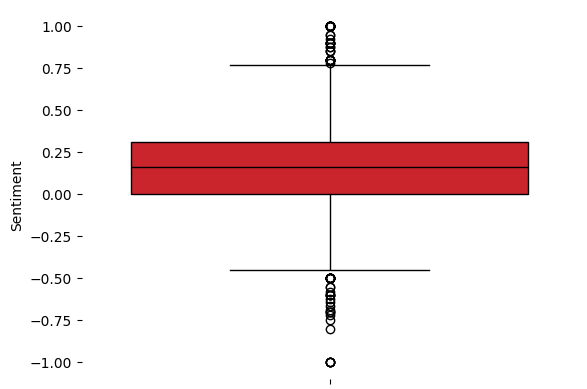

In [11]:
def boxplots(dataframe):
    ax = sns.boxplot(y='sentiment', data=dataframe, color="#E50914", linecolor="#000", linewidth=1)
    for s in ["top", "bottom", "right", "left"]:
        ax.spines[s].set_visible(False)
    plt.ylabel('Sentiment') 
    plt.show()

boxplots(users_reviews_df)
boxplots(critics_reviews_df)

In [12]:
critics_sentiment_pivot = critics_reviews_df.pivot_table(values='sentiment', index='title', aggfunc='mean')

critics_sentiment_pivot.reset_index(inplace=True)

users_sentiment_pivot = users_reviews_df.pivot_table(values='sentiment', index='title', aggfunc='mean')

users_sentiment_pivot.reset_index(inplace=True)

sentiment_pivot = critics_sentiment_pivot.merge(users_sentiment_pivot, on='title', how='left')

sentiment_pivot.rename(columns={"sentiment_x": 'critics_sentiment', 'sentiment_y': 'users_sentiment'}, inplace=True)

sentiment_pivot.dropna(inplace=True)

sentiment_pivot.head(4)

,title,critics_sentiment,users_sentiment
0,13 Reasons Why,0.036695,0.072973
1,After Life,0.121172,0.187981
2,Alias Grace,0.212841,0.305353
4,All of Us Are Dead,0.054240,0.190990


In [13]:
correlation_coefficient, p_value = pearsonr(sentiment_pivot['users_sentiment'], sentiment_pivot['critics_sentiment'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.3208387717942661
P-value: 0.002305975306896666


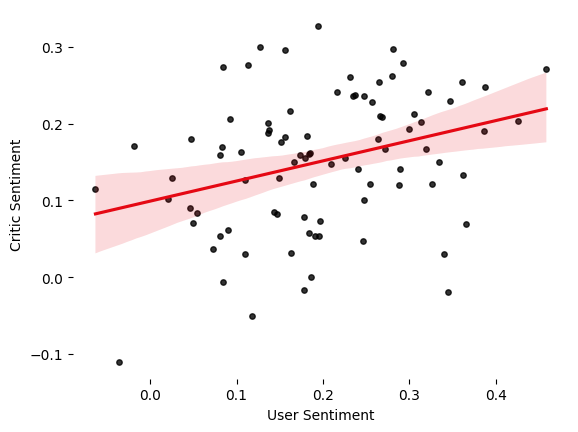

In [14]:
sns.regplot(data=sentiment_pivot, x="users_sentiment", y="critics_sentiment", scatter_kws={'color':'black', 's': 15}, line_kws={'color':'#E50914'})
plt.ticklabel_format(style = 'plain')

plt.xlabel('User Sentiment')  
plt.ylabel('Critic Sentiment')  

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

<h2> Chmury Wyrazów

In [17]:
def reviews_wordclouds(dataframe):
    positive_reviews_df = dataframe[dataframe['sentiment']>=0]
    positive_reviews_df = positive_reviews_df.loc[:, ['review']]
    negative_reviews_df = dataframe[dataframe['sentiment']<0]
    negative_reviews_df = negative_reviews_df.loc[:, ['review']]
    dataframe['title'] = dataframe['title'].str.lower()
    titles_list = dataframe['title'].to_list()
    stop_words = ['show', 'series', 'enough', 'netflix', 'part', 'season', 'episode', 'the', 'and', 'of', 'in', 'i', 'it', 'an', 'than', 'with', 'on', 'what', 'about', 'so', 'for', 'by', 'to', 'who', 'why', 's', 'as', 'a', 'its', 'this', 'that', 'but', 'her', 'there', 'has', 'are', 'some', 'is', 'at', 'if', 'from', 'much', 'not', 'we', 'more', 'be', 'scenes', 'all', 'no', 'have', 'or', 'most', 't', 'll','out', 'just', 'will', 'collette', 'toni collette', 'myers', 'example', 'his'] 
    stop_words = stop_words + titles_list
    for reviews_df in [positive_reviews_df, negative_reviews_df]:
        text = reviews_df.values 
        wordcloud = WordCloud(stopwords=stop_words, background_color="black", colormap='Reds').generate(str(text))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

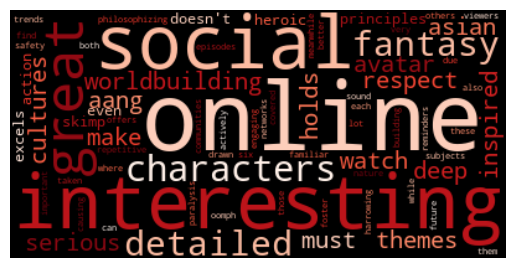

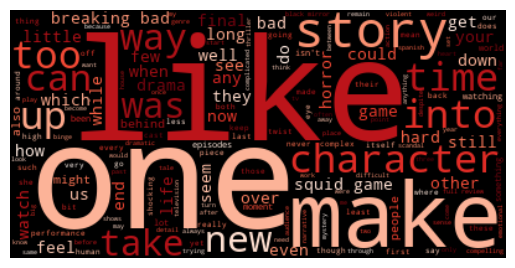

In [18]:
reviews_wordclouds(critics_reviews_df)

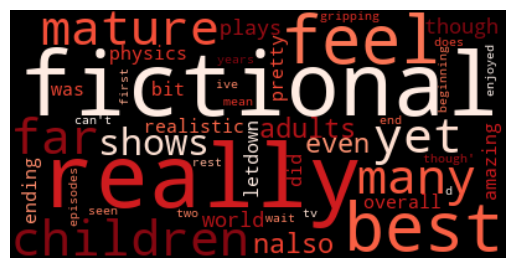

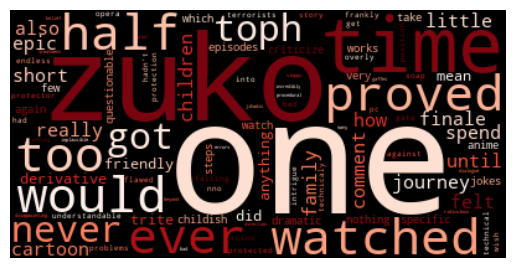

In [19]:
reviews_wordclouds(users_reviews_df)